In [24]:
!pip install -r requirements.txt

  Using cached pandas-1.5.0-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ortools 9.10.4067 requires pandas>=2.0.0, but you have pandas 1.5.0 which is incompatible.

[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...


In [1]:
import crop_sim
import importlib
importlib.reload(crop_sim)

<module 'crop_sim' from '/Users/theron/code/crop-models/crop_sim.py'>

In [2]:
zip_codes = crop_sim.load_zip("78704")
loca_tasmin, loca_tasmax = crop_sim.load_temperature_data(zip_codes)
zip_codes = crop_sim.add_loca_index(zip_codes, loca_tasmin, loca_tasmax)
zip_codes

ZIP  latitude  longitude loca_index
0  78704   30.2428   -97.7658   (19, 19)

In [3]:
min_days = loca_tasmin.groupby("time.dayofyear").mean("time")

In [4]:
max_days = loca_tasmax.groupby("time.dayofyear").mean("time")

In [29]:
# min_days.to_dataframe().loc[3]

In [5]:
import xarray as xr
import pandas as pd

start_year = 2022
end_year = 2023
time_index = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq="D")
two_year_tasmin = xr.DataArray(
    coords={"time": time_index, "lat": min_days.lat, "lon": min_days.lon},
    dims=["time", "lat", "lon"],
)

two_year_tasmax = xr.DataArray(
    coords={"time": time_index, "lat": max_days.lat, "lon": max_days.lon},
    dims=["time", "lat", "lon"],
)

# Fill values from min_days for each day of year 
for t in two_year_tasmin.time:
    day_of_year = t.dt.dayofyear
    # month = t.dt.month
    two_year_tasmin.loc[t, :, :] = min_days.sel(dayofyear=day_of_year)
    two_year_tasmax.loc[t, :, :] = max_days.sel(dayofyear=day_of_year)


In [7]:
two_year_tasmin

<xarray.DataArray (time: 730, lat: 48, lon: 48)>
array([[[276.88137817, 277.30288696, 277.57739258, ..., 280.21237183,
         280.66268921, 281.17178345],
        [277.08358765, 277.3494873 , 277.64190674, ..., 279.87130737,
         280.15930176, 280.51602173],
        [277.22616577, 277.41238403, 277.48638916, ..., 279.30355835,
         279.42919922, 279.69607544],
        ...,
        [275.40914917, 275.47012329, 275.27154541, ..., 279.28408813,
         279.537323  , 279.8710022 ],
        [275.32058716, 275.02316284, 274.97232056, ..., 279.00167847,
         279.1789856 , 279.65661621],
        [275.42584229, 275.06765747, 275.14428711, ..., 278.71530151,
         278.97640991, 279.41439819]],

       [[274.11010742, 274.55310059, 274.85861206, ..., 278.6842041 ,
         278.58828735, 278.52624512],
        [273.85791016, 274.24041748, 274.61834717, ..., 278.59457397,
         278.57611084, 278.40859985],
        [274.22576904, 274.42340088, 274.55401611, ..., 279.01525879,
         278.72241211, 278.25091553],
...
        [274.37188721, 274.16052246, 273.74035645, ..., 275.91577148,
         275.9041748 , 276.14373779],
        [274.41650391, 273.98059082, 273.68890381, ..., 276.0680542 ,
         275.95697021, 276.46640015],
        [274.70098877, 274.25244141, 274.01773071, ..., 275.86584473,
         275.86730957, 275.96075439]],

       [[276.78240967, 276.47827148, 276.24157715, ..., 280.79321289,
         280.10272217, 279.49835205],
        [276.45513916, 276.421875  , 276.32769775, ..., 280.61431885,
         280.23394775, 279.24951172],
        [276.17089844, 275.98535156, 275.93356323, ..., 279.75161743,
         279.57189941, 279.28436279],
        ...,
        [274.74328613, 274.59902954, 274.41326904, ..., 276.81890869,
         276.84460449, 277.05496216],
        [274.68179321, 274.25476074, 274.06326294, ..., 276.98443604,
         277.13031006, 277.32226562],
        [274.74255371, 274.10992432, 274.1385498 , ..., 277.05401611,
         277.26220703, 277.42480469]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2023-12-31
  * lat      (lat) float32 29.03 29.09 29.16 29.22 ... 31.78 31.84 31.91 31.97
  * lon      (lon) float32 261.0 261.1 261.2 261.2 ... 263.8 263.8 263.9 264.0

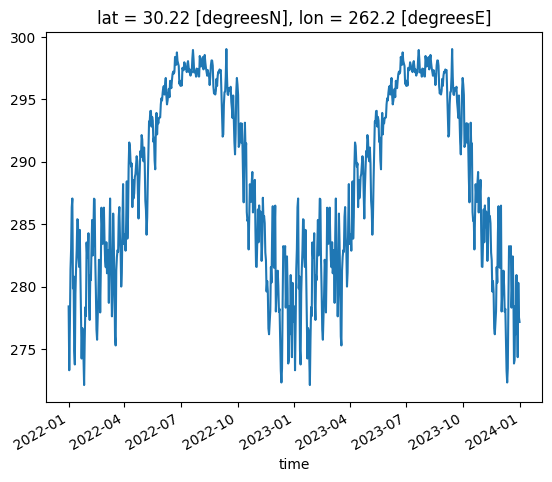

In [8]:
import matplotlib.pyplot as plt
plt.figure()
two_year_tasmin.isel(lat=19,lon=19).plot()
plt.show()

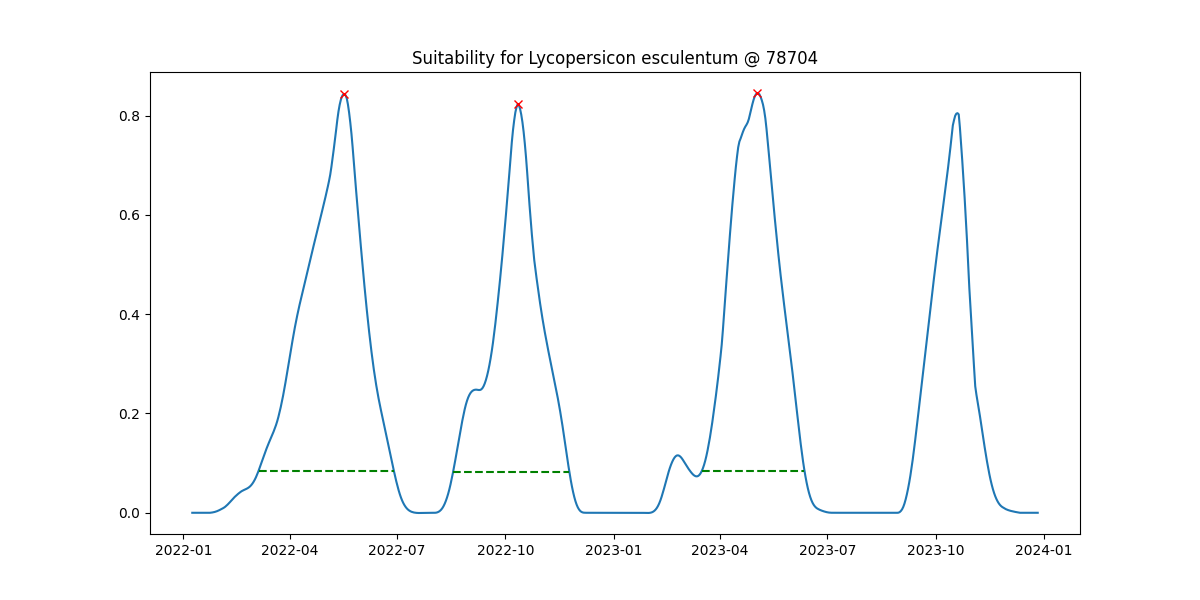

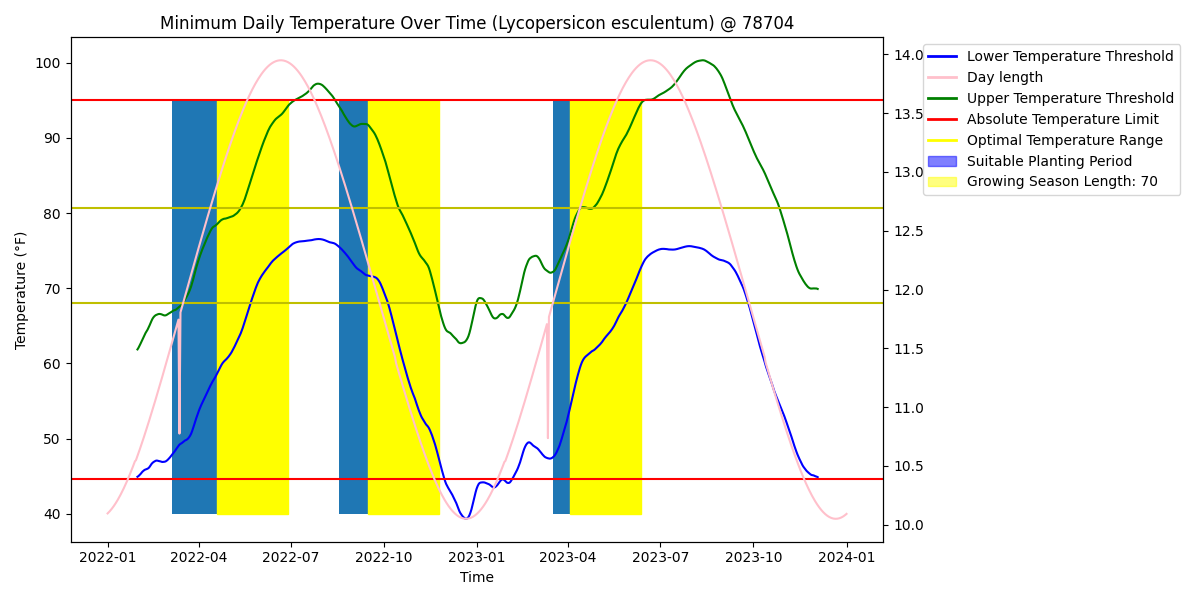

{70: [(3, 5, 4, 19), (8, 17, 9, 15)],
 80: [(3, 5, 4, 9)],
 90: [(3, 5, 3, 30)],
 100: [(3, 5, 3, 20)],
 110: [(3, 5, 3, 10)],
 120: [],
 130: [],
 140: [],
 150: []}

In [4]:
import matplotlib
matplotlib.pyplot.close()
%matplotlib widget

# Select your crop of interest (replace 'Maize' with your desired crop)
# crop_name = 'Allium cepa' #onion
crop_name= "Lycopersicon esculentum" # Tomatoes
# crop_name = "Brassica juncea" # Mustard greens
# crop_name = "Vigna unguiculata"
# crop_name = "Asparagus officinalis" # asparagus
# crop_name = "Ipomoea batatas" # sweet potato
# crop_name = "Solanum tuberosum" # Potato
# crop_name = "Cynara scolymus" # artichoke
bolting = False
frost_tolerance = 0

# 93922 monterey county

# short day: 11-12, long=14;16
min_day = 0
max_day = 24
crop_sim.all_in_one("78704", crop_name, bolting, min_day, max_day)

In [98]:
# crop_sim.plot_suitability(view_window, growing_season_suitability, daily_suitability, lat, lon, crop_name, cutoff)

In [631]:
# suit = growing_season_suitability[view_window]
# x = suit.where(suit > 0)
# y = xr.where(suit > 0, suit, 0)
# x == y
# print(suit)

In [646]:
# plt.subplots(figsize=(12, 6))

# # plt.plot(suit.time, .isel(lat=lat,lon=lon), color="green")
# plt.plot(suit.time, suit.isel(lat=lat,lon=lon))
# # from scipy.signal import savgol_filter
# # # Apply Savitzky-Golay filter
# # window_length = 13  # Must be odd
# # polyorder = 3

# # smoothed_data = xr.apply_ufunc(
# #     savgol_filter,
# #     suit,
# #     kwargs={"window_length": window_length, "polyorder": polyorder},
# #     input_core_dims=[["time"]],
# #     output_core_dims=[["time"]],  # Output is a single value per input
# #     output_dtypes=[suit.dtype]
# # )
# # plt.plot(smoothed_data.isel(lat=lat,lon=lon))
# plt.show()